In [5]:

import pandas as pd

df = pd.read_csv(r'bank.csv')

In [6]:

print(df.isnull().sum())


df_encoded = pd.get_dummies(df, drop_first=True)

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    0
dtype: int64


In [7]:

df_encoded.columns

Index(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"_19;"student";"single";"secondary";"no";302;"no";"no";"cellular";16;"jul";205;1;-1;0;"unknown";"yes"',
       'age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"_19;"student";"single";"unknown";"no";0;"no";"no";"cellular";11;"feb";123;3;-1;0;"unknown";"no"',
       'age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"_19;"student";"single";"unknown";"no";1169;"no";"no";"cellular";6;"feb";463;18;-1;0;"unknown";"no"',
       'age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"_20;"student";"single";"secondary";"no";1191;"no";"no";"cellular";12;"feb"

In [8]:
import pandas as pd

df = pd.read_csv(r'bank.csv', delimiter=';')

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable 'y'
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df.drop('y', axis=1))

# Including the target variable back
df_encoded['y'] = df['y']

In [11]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8917127071823204
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       807
           1       0.50      0.54      0.52        98

    accuracy                           0.89       905
   macro avg       0.72      0.74      0.73       905
weighted avg       0.90      0.89      0.89       905



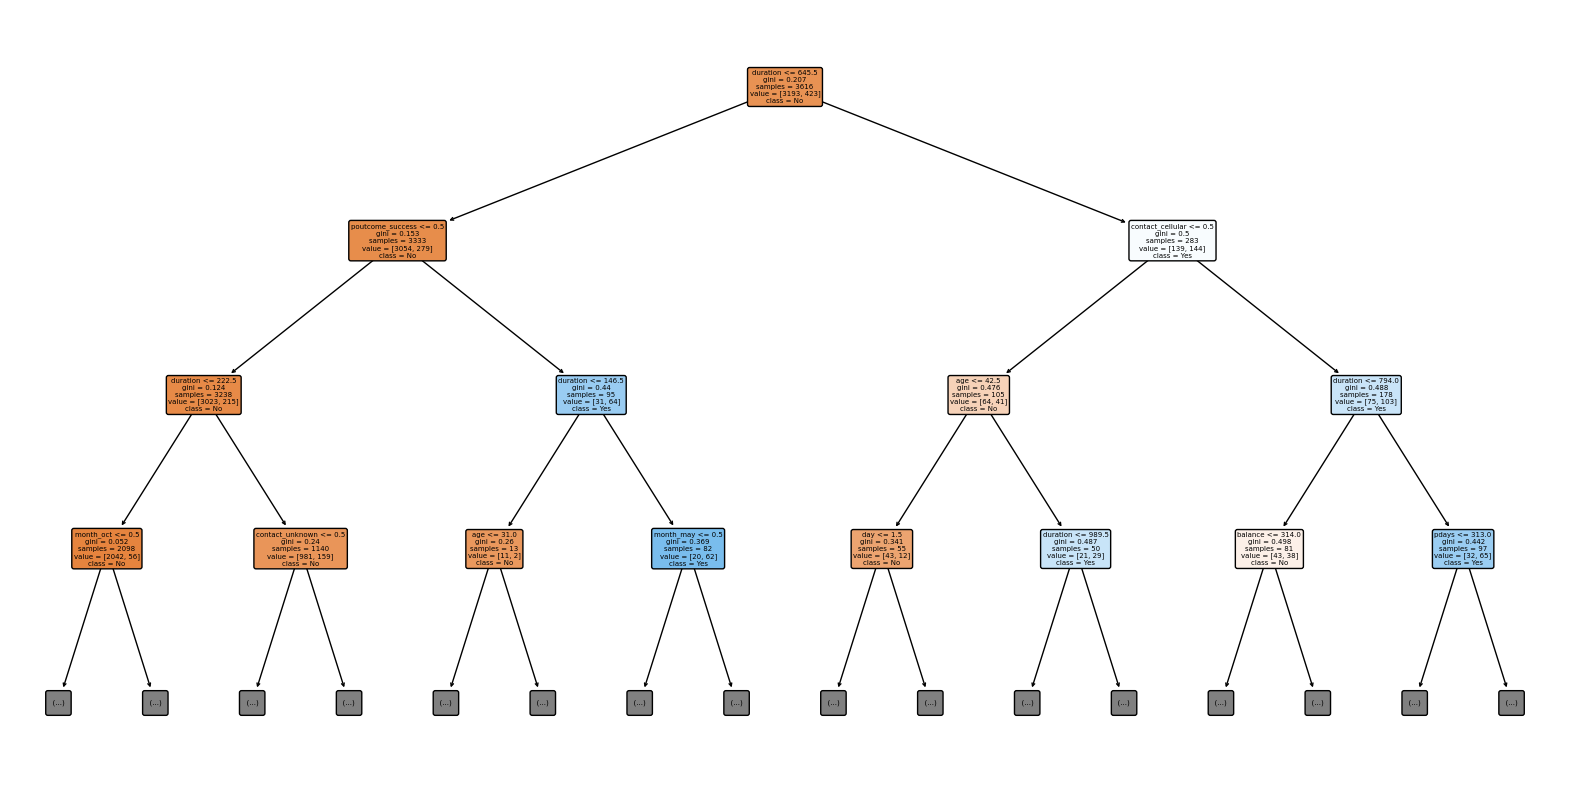

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Training the model (repeating this step for clarity)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], rounded=True, max_depth=3)
plt.show()